# EMG Analysis

## Background

- **Electromyography(EMG)** - Muscle activity analysis and diagnosis. An EMG test checks the electrical activity of the muscle systems in the body and the nerves that operate those muscles.  An EMG also tests the electrical impulse transmission at the neuromuscular junction (between the nerve and the muscle).
- **Surface EMG(sEMG)** - Using on-skin electrodes to register muscle activity
- **putEMG** - A multichannel sEMG recordings of hand gestures dataset

Publicly available multichannel sEMG recordings of hand gestures datasets:
1. ???

### The putEMG dataset

The putEMG dataset contains sEMG data acquired by 3 8-electrodes elastic band placed around the subject's forearm.

![sEMG electrodes placement](./assets/electrodes_placement.png "sEMG electrodes placement")

7 active gesture plus one idle state are recorded. Each gesture is repeated 20 times. 44 participants were recorded preforming an identical protocol of gestures. Each participant was recorded twice with one-week interval between tests.


#### The Procedure

The set of gestures consists of 7 *active* gestures and one *idle* gesture


![Gestures](./assets/gestures.png "Gestures")

The user preforms the following procedure:
for i in [1,2,3,4,5,6,7,8]:
    1. Do gesture i for 1 or 3 seconds (depending on trajectory - more on this later)
    2. Do *idle* gesture for 3 seconds



Each experiment consisted of 3 trajectories and each trajectory is divided to *action blocks*. Between action blocks user were able to *relax* and move their hands freely for 10 seconds. A *relax* period is marked as -1. Each action block begins and ends with an *idle* gesture.

 - **repeats_long** - 7 action blocks, each block contains 8 repetitions of each active gesture: [relax] 0-1-0-1-0-1-0-1-0-1-0-1-0-1-0-1-0 [relax] 0-2-0-2-0-2-0-2-0-2-0-2-0-2-0-2-0 [relax] 0-3-0... ,
 - **sequential** - 6 action blocks, each block is a subsequent execution of all active gestures: [relax] 0-1-0-2-0-3-0-6-0-7-0-8-0-9-0 [relax] 0-1-0-2-0-3-0-6-0-7-0-8-0-9-0 [relax] 0-1-0-2-0... ,
 - **repeats_short** - 7 action blocks, each block contains 6 repetitions of each active gesture: [relax] 0-1-0-1-0-1-0-1-0-1-0-1-0 [relax] 0-2-0-2-0-2-0-2-0-2-0-2-0 [relax] 0-3-0... .


These 3 trajectories are summed to repeat each gesture 20 times.

#### Trajectory Columns

There are 3 columns indicating the "ground truth" trajectory:
 - TRAJ_1 - The gesture that was presented to the participant
 - TRAJ_GT_NO_FILTER - Gesture labeling using video stream gesture recognition algorithm. A VGGNet based recognition with no filter.
 - TRAJ_GT - The output of a median filter applied to the VGGNet and a window of 250ms before presenting the action $i$ to 2000ms after presenting the next action where outside this window action $i$ was discarded.

## Load Data

In [30]:
import glob
import os
import os.path
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
time.ctime()

'Sun Feb 27 10:10:31 2022'

In [31]:
# constants

file_path = '../putemg-downloader/Data-HDF5'
trial_name = 'emg_gestures-03-repeats_long-2018-05-11-11-05-00-695'
filtered_file = '/filtered-03-repeats_long-2018-05-11-11-05-00-695'
users_list = ['03', '04', '05', '06', '07']
# users_list = ['03', '04', '05', '06', '07']

In [32]:
data = pd.read_hdf(f'{file_path}/{trial_name}.hdf5')

In [33]:
len(list(data.columns))

32

In [34]:
data.columns

Index(['EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_7', 'EMG_8',
       'EMG_9', 'EMG_10', 'EMG_11', 'EMG_12', 'EMG_13', 'EMG_14', 'EMG_15',
       'EMG_16', 'EMG_17', 'EMG_18', 'EMG_19', 'EMG_20', 'EMG_21', 'EMG_22',
       'EMG_23', 'EMG_24', 'TRAJ_1', 'type', 'subject', 'trajectory',
       'date_time', 'TRAJ_GT_NO_FILTER', 'VIDEO_STAMP', 'TRAJ_GT'],
      dtype='object')

In [35]:
data.describe()

,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,EMG_10,...,EMG_20,EMG_21,EMG_22,EMG_23,EMG_24,TRAJ_1,subject,TRAJ_GT_NO_FILTER,VIDEO_STAMP,TRAJ_GT
count,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,...,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1746944.0,1.746944e+06,1.746944e+06,1.746944e+06
mean,-8.593956e-01,-1.126915e+00,-1.207062e+00,-1.148923e+00,-1.121989e+00,-1.084297e+00,-1.125070e+00,-1.068164e+00,-9.554307e-01,-8.701996e-01,...,-8.646139e-01,-8.435554e-01,-8.189020e-01,-8.504938e-01,-8.147153e-01,1.572390e+00,3.0,1.686383e+00,1.683065e+02,1.622857e+00
std,3.520997e+01,2.084021e+01,1.820541e+01,1.521687e+01,1.630718e+01,2.818686e+01,1.899237e+01,1.677428e+01,3.431482e+01,1.900282e+01,...,1.415258e+01,1.452622e+01,1.531249e+01,1.575353e+01,1.628675e+01,3.015924e+00,0.0,3.081553e+00,9.841730e+01,3.055647e+00
min,-5.410000e+02,-4.090000e+02,-4.220000e+02,-1.880000e+02,-1.810000e+02,-2.260000e+02,-2.130000e+02,-1.720000e+02,-7.160000e+02,-2.910000e+02,...,-1.610000e+02,-1.450000e+02,-1.480000e+02,-2.120000e+02,-1.840000e+02,-1.000000e+00,3.0,-1.000000e+00,-2.157148e+00,-1.000000e+00
25%,-8.000000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,-8.000000e+00,-8.000000e+00,-9.000000e+00,-7.000000e+00,-7.000000e+00,-6.000000e+00,...,-6.000000e+00,-6.000000e+00,-6.000000e+00,-6.000000e+00,-6.000000e+00,0.000000e+00,3.0,0.000000e+00,8.307466e+01,0.000000e+00
50%,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,3.0,0.000000e+00,1.683065e+02,0.000000e+00
75%,7.000000e+00,6.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,...,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,3.0,3.000000e+00,2.535383e+02,2.000000e+00
max,7.950000e+02,4.360000e+02,4.060000e+02,3.010000e+02,3.120000e+02,5.050000e+02,2.780000e+02,2.910000e+02,4.350000e+02,3.420000e+02,...,2.810000e+02,2.860000e+02,2.960000e+02,2.910000e+02,2.910000e+02,9.000000e+00,3.0,9.000000e+00,3.387701e+02,9.000000e+00


Each EMG_$i$ signal is a raw ADC value read from electrode $i$. This raw value can be converted to milivolt using the following formula
$$x = \frac{N \cdot 5}{2^{12}} \cdot \frac{1000}{200}[mV]$$ where $N$ is the raw ADC reading.

In [36]:
data.head(50)

,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,EMG_10,...,EMG_23,EMG_24,TRAJ_1,type,subject,trajectory,date_time,TRAJ_GT_NO_FILTER,VIDEO_STAMP,TRAJ_GT
-0.018603,1.0,1.0,1.0,0.0,-2.0,-4.0,1.0,1.0,2.0,-1.0,...,3.0,3.0,-1.0,emg_gestures,3.0,repeats_long,2018-05-11 11:05:00.695,-1.0,-2.157148,-1.0
-0.018408,4.0,4.0,4.0,2.0,0.0,-2.0,4.0,4.0,4.0,2.0,...,4.0,4.0,-1.0,emg_gestures,3.0,repeats_long,2018-05-11 11:05:00.695,-1.0,-2.156953,-1.0
-0.018213,12.0,12.0,11.0,9.0,8.0,3.0,13.0,11.0,11.0,10.0,...,7.0,7.0,-1.0,emg_gestures,3.0,repeats_long,2018-05-11 11:05:00.695,-1.0,-2.156758,-1.0
-0.018018,19.0,17.0,17.0,14.0,14.0,7.0,19.0,17.0,16.0,16.0,...,10.0,9.0,-1.0,emg_gestures,3.0,repeats_long,2018-05-11 11:05:00.695,-1.0,-2.156563,-1.0
-0.017823,18.0,17.0,17.0,15.0,14.0,7.0,19.0,17.0,15.0,17.0,...,10.0,9.0,-1.0,emg_gestures,3.0,repeats_long,2018-05-11 11:05:00.695,-1.0,-2.156368,-1.0
-0.017627,11.0,10.0,11.0,9.0,7.0,2.0,12.0,10.0,10.0,10.0,...,7.0,7.0,-1.0,emg_gestures,3.0,repeats_long,2018-05-11 11:05:00.695,-1.0,-2.156173,-1.0
-0.017432,0.0,0.0,1.0,0.0,-2.0,-5.0,1.0,1.0,2.0,1.0,...,3.0,3.0,-1.0,emg_gestures,3.0,repeats_long,2018-05-11 11:05:00.695,-1.0,-2.155978,-1.0
-0.017237,-6.0,-5.0,-4.0,-6.0,-9.0,-11.0,-5.0,-4.0,-4.0,-4.0,...,1.0,1.0,-1.0,emg_gestures,3.0,repeats_long,2018-05-11 11:05:00.695,-1.0,-2.155782,-1.0
-0.017042,-4.0,-4.0,-3.0,-5.0,-7.0,-11.0,-3.0,-3.0,-2.0,-3.0,...,1.0,1.0,-1.0,emg_gestures,3.0,repeats_long,2018-05-11 11:05:00.695,-1.0,-2.155587,-1.0
-0.016847,1.0,1.0,0.0,-1.0,-3.0,-6.0,0.0,1.0,1.0,1.0,...,3.0,3.0,-1.0,emg_gestures,3.0,repeats_long,2018-05-11 11:05:00.695,-1.0,-2.155392,-1.0


In [37]:
data[['TRAJ_1','TRAJ_GT', 'TRAJ_GT_NO_FILTER']].value_counts()

TRAJ_1  TRAJ_GT  TRAJ_GT_NO_FILTER
 0.0     0.0      0.0                 845822
-1.0    -1.0     -1.0                 204047
 6.0     6.0      6.0                  76377
 9.0     9.0      9.0                  74660
 1.0     1.0      1.0                  67979
 8.0     8.0      8.0                  67798
 7.0     7.0      7.0                  66147
 2.0     2.0      2.0                  64779
 3.0     3.0      3.0                  63021
 0.0     3.0      3.0                  24257
 3.0     0.0      0.0                  18964
 0.0     1.0      1.0                  18789
         2.0      2.0                  17362
 2.0     0.0      0.0                  17207
 0.0     9.0      9.0                  14853
         7.0      7.0                  14452
 1.0     0.0      0.0                  14006
 0.0     6.0      6.0                  12280
         8.0      8.0                  11425
 7.0     0.0      0.0                  11038
 8.0     0.0      0.0                  10812
 9.0     0.0      0.

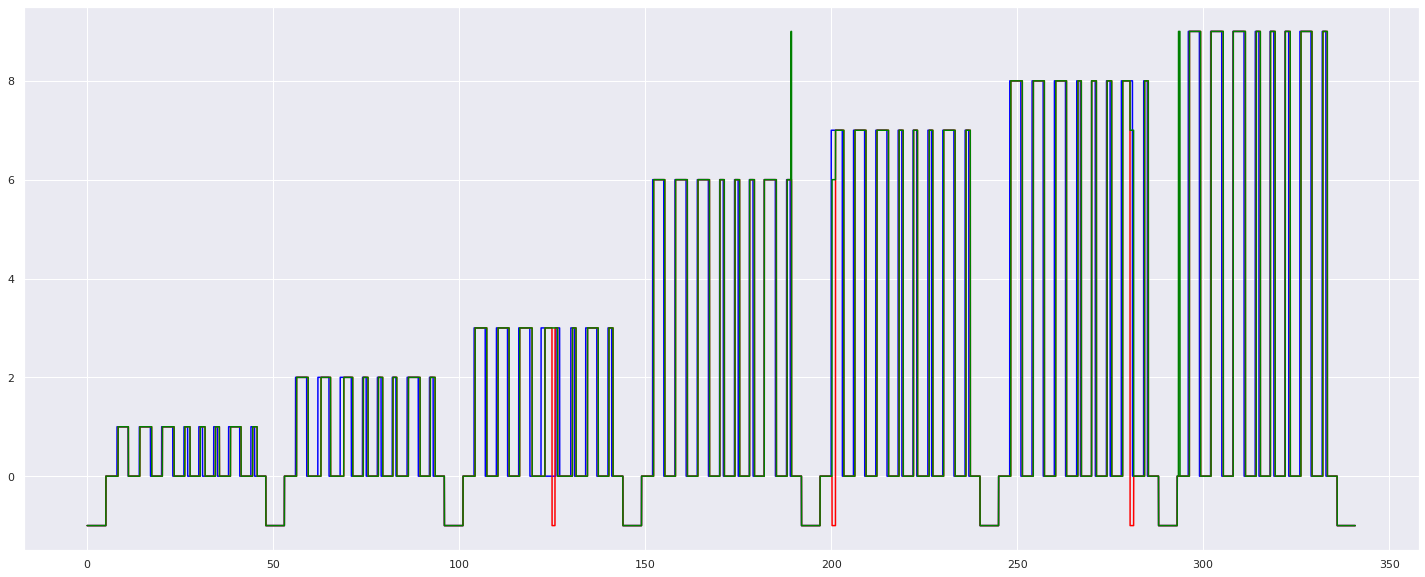

In [38]:
plt.figure(figsize=(25,10))
# ax = plt.axes((1,3))

plt.plot(data['TRAJ_1'], color='blue')
plt.plot(data['TRAJ_GT'], color='red')
plt.plot(data['TRAJ_GT_NO_FILTER'], color='green');

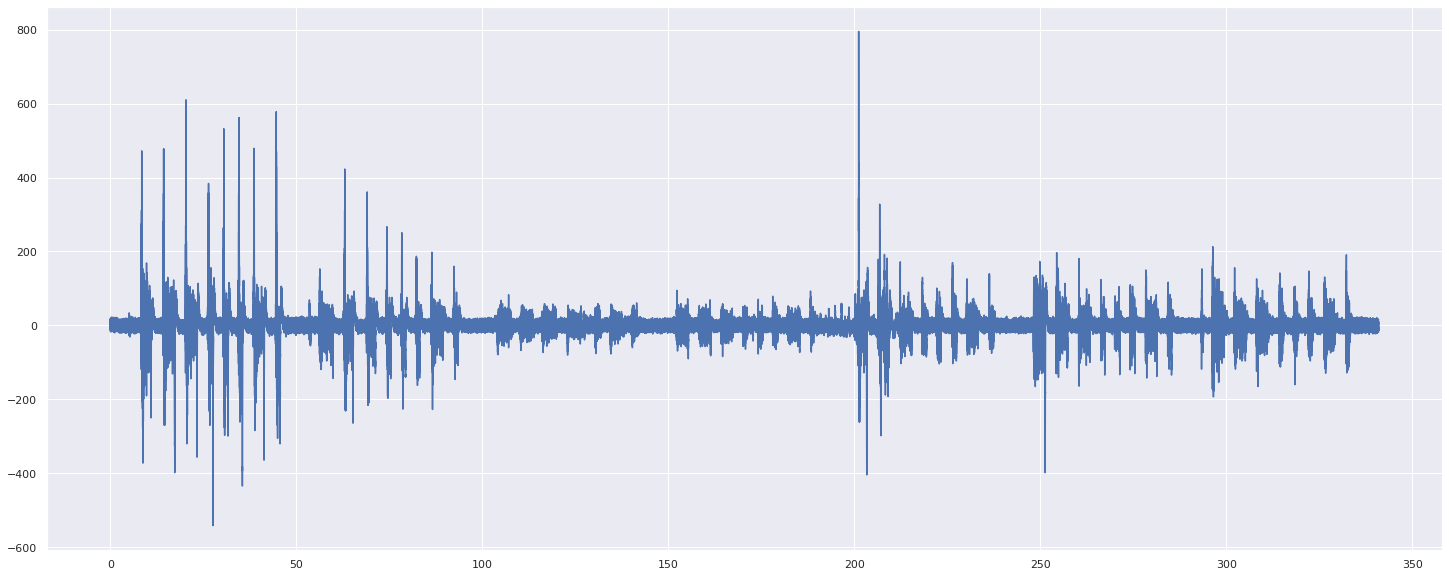

In [39]:
plt.figure(figsize=(25,10))
plt.plot(data.EMG_1)

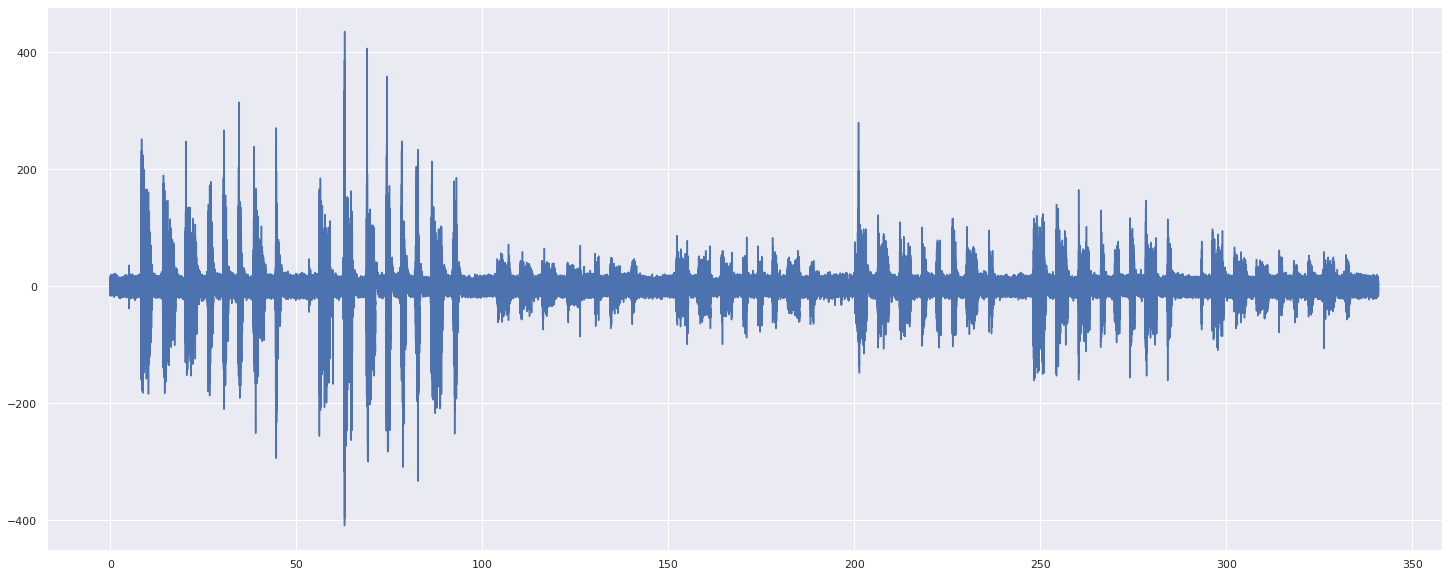

In [40]:
plt.figure(figsize=(25,10))
plt.plot(data.EMG_2)

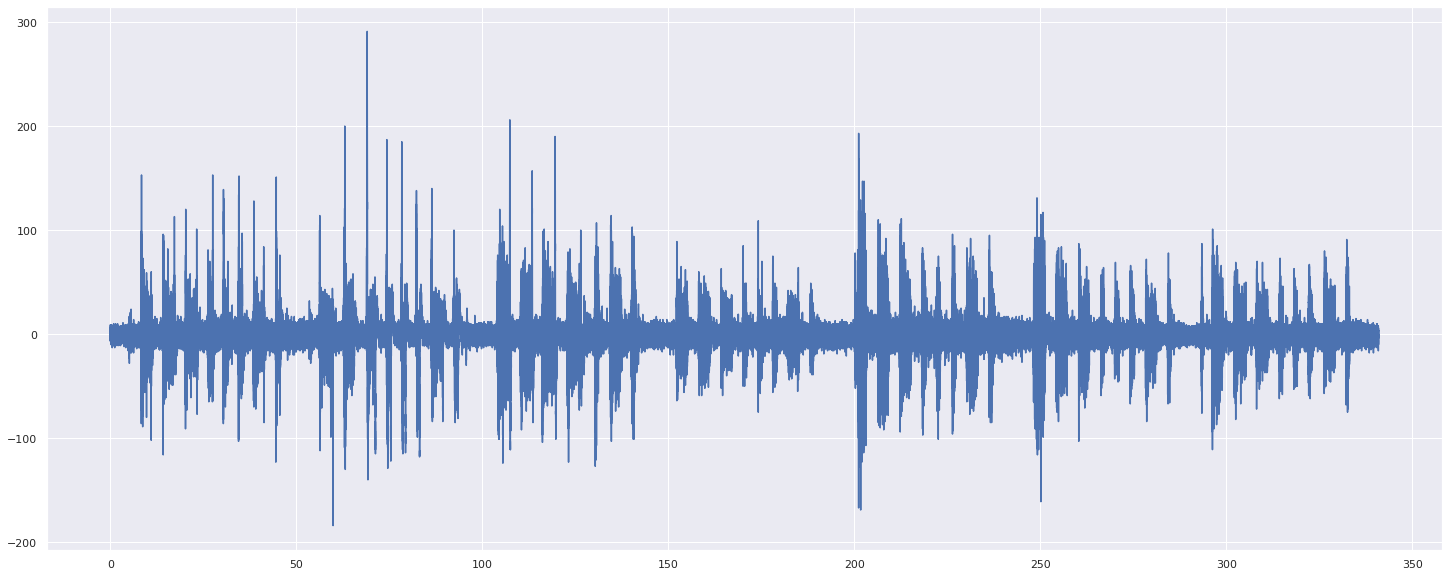

In [41]:
plt.figure(figsize=(25,10))
plt.plot(data.EMG_24)

#### Understanding feature importance using a Decision Tree Classifier

##### Define train and test set for classification

In [44]:
from sklearn.model_selection import train_test_split
data_with_no_relax = data[data.TRAJ_GT != -1]
X = data_with_no_relax.iloc[:,0:24].to_numpy()
y = data_with_no_relax.TRAJ_GT
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [45]:
from sklearn.tree import DecisionTreeClassifier

model  = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [51]:
ypred = model.predict(Xtest)
ypred.shape

(382106,)

In [48]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96    235007
         1.0       0.70      0.71      0.70     21210
         2.0       0.72      0.74      0.73     20083
         3.0       0.70      0.72      0.71     21420
         6.0       0.58      0.58      0.58     22639
         7.0       0.62      0.63      0.63     19800
         8.0       0.64      0.65      0.65     19368
         9.0       0.67      0.66      0.67     22579

    accuracy                           0.85    382106
   macro avg       0.70      0.71      0.70    382106
weighted avg       0.85      0.85      0.85    382106



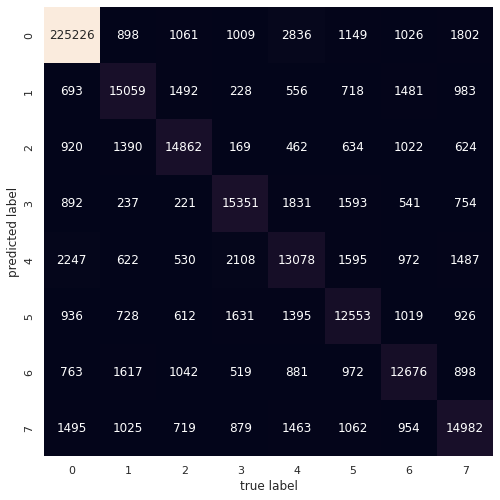

In [52]:
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(11.7,8.27)})
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<BarContainer object of 24 artists>

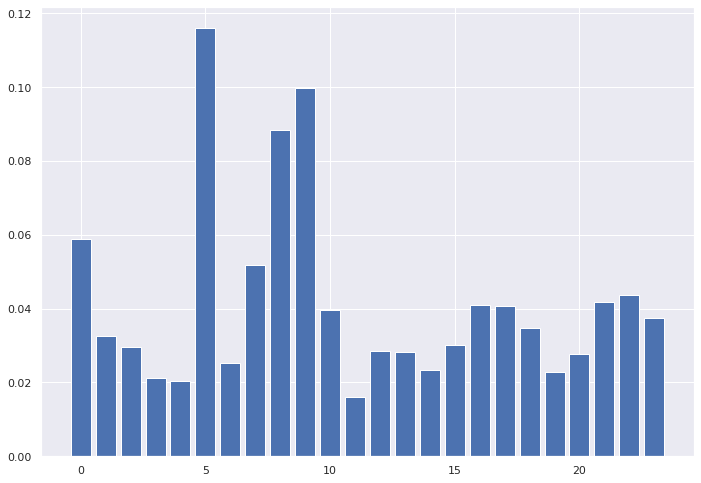

In [53]:
importance = model.feature_importances_
plt.bar([x for x in range(len(importance))], importance)

In [54]:
from sklearn import tree
text_representation = tree.export_text(model, feature_names= list(data.columns[0:24]) )
# text_representation = tree.export_text(model)
print(text_representation)

|--- EMG_6 <= -15.50
|   |--- EMG_1 <= -32.50
|   |   |--- EMG_24 <= -39.50
|   |   |   |--- EMG_6 <= -61.50
|   |   |   |   |--- EMG_24 <= -57.50
|   |   |   |   |   |--- EMG_18 <= -128.50
|   |   |   |   |   |   |--- EMG_21 <= -87.50
|   |   |   |   |   |   |   |--- EMG_2 <= -161.00
|   |   |   |   |   |   |   |   |--- EMG_21 <= -128.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- EMG_21 >  -128.50
|   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- EMG_2 >  -161.00
|   |   |   |   |   |   |   |   |--- class: 8.0
|   |   |   |   |   |   |--- EMG_21 >  -87.50
|   |   |   |   |   |   |   |--- EMG_11 <= -78.00
|   |   |   |   |   |   |   |   |--- EMG_24 <= -108.50
|   |   |   |   |   |   |   |   |   |--- EMG_13 <= -79.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |   |--- EMG_13 >  -79.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |  

In [55]:
reduced_model = DecisionTreeClassifier(max_features=5)
reduced_model.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_features=5)

In [56]:
ypred = reduced_model.predict(Xtest)
ypred

array([0., 0., 0., ..., 3., 0., 0.])

In [57]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    234442
         1.0       0.68      0.69      0.69     21387
         2.0       0.71      0.73      0.72     19949
         3.0       0.68      0.70      0.69     21412
         6.0       0.57      0.56      0.56     22837
         7.0       0.59      0.60      0.60     19751
         8.0       0.62      0.62      0.62     19689
         9.0       0.64      0.64      0.64     22639

    accuracy                           0.84    382106
   macro avg       0.68      0.69      0.68    382106
weighted avg       0.84      0.84      0.84    382106



In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10)
rf_model.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=10)

In [59]:
ypred = rf_model.predict(Xtest)
ypred

array([0., 0., 0., ..., 3., 0., 0.])

In [60]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97    240620
         1.0       0.83      0.85      0.84     21313
         2.0       0.86      0.89      0.88     19837
         3.0       0.87      0.82      0.84     23134
         6.0       0.73      0.74      0.73     22344
         7.0       0.74      0.84      0.79     17748
         8.0       0.77      0.87      0.82     17301
         9.0       0.77      0.87      0.81     19809

    accuracy                           0.91    382106
   macro avg       0.82      0.85      0.84    382106
weighted avg       0.92      0.91      0.92    382106



<BarContainer object of 24 artists>

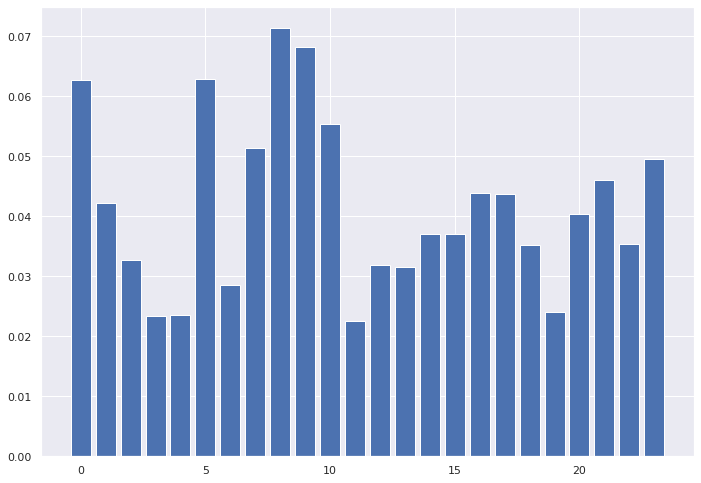

In [62]:
importance = rf_model.feature_importances_
plt.bar([x for x in range(len(importance))], importance)

In [64]:
other_user_file = 'emg_gestures-04-repeats_long-2018-03-28-12-38-01-391'
other_data = pd.read_hdf(f'{file_path}/{other_user_file}.hdf5')

In [65]:
other_data.head(20)

,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,EMG_10,...,EMG_23,EMG_24,TRAJ_1,type,subject,trajectory,date_time,TRAJ_GT_NO_FILTER,VIDEO_STAMP,TRAJ_GT
-0.068499,3.0,4.0,4.0,4.0,5.0,6.0,4.0,4.0,2.0,4.0,...,3.0,4.0,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.918692,-1.0
-0.068304,4.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,...,2.0,3.0,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.918497,-1.0
-0.068109,5.0,6.0,4.0,5.0,6.0,4.0,5.0,6.0,5.0,8.0,...,3.0,4.0,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.918302,-1.0
-0.067913,7.0,6.0,5.0,5.0,7.0,4.0,6.0,7.0,5.0,8.0,...,3.0,4.0,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.918107,-1.0
-0.067718,3.0,2.0,1.0,2.0,3.0,0.0,3.0,3.0,1.0,5.0,...,0.0,0.0,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.917912,-1.0
-0.067523,-2.0,-4.0,-4.0,-4.0,-3.0,-5.0,-2.0,-2.0,-3.0,0.0,...,-2.0,-3.0,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.917717,-1.0
-0.067328,-5.0,-5.0,-6.0,-7.0,-6.0,-6.0,-5.0,-4.0,-5.0,-4.0,...,-3.0,-4.0,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.917521,-1.0
-0.067133,-2.0,-3.0,-4.0,-4.0,-2.0,-2.0,-3.0,-3.0,-4.0,-3.0,...,-1.0,-1.0,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.917326,-1.0
-0.066938,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,...,0.0,0.0,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.917131,-1.0
-0.066743,-2.0,-2.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-3.0,-2.0,...,-1.0,0.0,-1.0,emg_gestures,4.0,repeats_long,2018-03-28 12:38:01.391,-1.0,-0.916936,-1.0


In [69]:
other_data_with_no_relax = other_data[other_data.TRAJ_GT != -1]
X_other = other_data_with_no_relax.iloc[:,0:24].to_numpy()
y_other = other_data_with_no_relax.TRAJ_GT

In [70]:
ypred = model.predict(X_other)
ypred.shape

(1497705,)

In [71]:
from sklearn import metrics
print(metrics.classification_report(ypred, y_other))

              precision    recall  f1-score   support

         0.0       0.60      0.77      0.68    630465
         1.0       0.15      0.27      0.19     53961
         2.0       0.32      0.25      0.28    110233
         3.0       0.31      0.38      0.35     78918
         6.0       0.25      0.14      0.18    278175
         7.0       0.17      0.09      0.12    170103
         8.0       0.10      0.09      0.10    102032
         9.0       0.15      0.15      0.15     73818

    accuracy                           0.42   1497705
   macro avg       0.26      0.27      0.26   1497705
weighted avg       0.38      0.42      0.39   1497705



In [72]:
ypred = rf_model.predict(X_other)
ypred.shape

(1497705,)

In [73]:
from sklearn import metrics
print(metrics.classification_report(ypred, y_other))

              precision    recall  f1-score   support

         0.0       0.66      0.74      0.70    710222
         1.0       0.19      0.32      0.24     56162
         2.0       0.42      0.34      0.37    107486
         3.0       0.42      0.54      0.47     75760
         6.0       0.30      0.15      0.20    321234
         7.0       0.16      0.11      0.13    137903
         8.0       0.05      0.09      0.07     53752
         9.0       0.15      0.31      0.20     35186

    accuracy                           0.47   1497705
   macro avg       0.29      0.32      0.30   1497705
weighted avg       0.46      0.47      0.45   1497705



#### Filtering and feature extraction

In [13]:
filtered_data =  pd.read_hdf(f'.{filtered_file}.hdf5')

In [14]:
len(list(filtered_data.columns))

32

In [15]:
filtered_data.columns

Index(['EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_7', 'EMG_8',
       'EMG_9', 'EMG_10', 'EMG_11', 'EMG_12', 'EMG_13', 'EMG_14', 'EMG_15',
       'EMG_16', 'EMG_17', 'EMG_18', 'EMG_19', 'EMG_20', 'EMG_21', 'EMG_22',
       'EMG_23', 'EMG_24', 'TRAJ_1', 'type', 'subject', 'trajectory',
       'date_time', 'TRAJ_GT_NO_FILTER', 'VIDEO_STAMP', 'TRAJ_GT'],
      dtype='object')

In [16]:
filtered_data.describe()

,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,EMG_10,...,EMG_20,EMG_21,EMG_22,EMG_23,EMG_24,TRAJ_1,subject,TRAJ_GT_NO_FILTER,VIDEO_STAMP,TRAJ_GT
count,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,...,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1.746944e+06,1746944.0,1.746944e+06,1.746944e+06,1.746944e+06
mean,1.069046e-04,1.042799e-04,1.102941e-04,1.107671e-04,1.316530e-04,7.688381e-05,8.897684e-05,8.312145e-05,9.109512e-05,1.439086e-04,...,7.153452e-05,6.021045e-05,4.166383e-05,4.387654e-05,4.978389e-05,1.572390e+00,3.0,1.686383e+00,1.683065e+02,1.622857e+00
std,1.585969e+01,1.751387e+01,1.457081e+01,1.235695e+01,1.264223e+01,1.541520e+01,1.610033e+01,1.370093e+01,1.404847e+01,1.658290e+01,...,1.006562e+01,1.100851e+01,1.207194e+01,1.273780e+01,1.136811e+01,3.015924e+00,0.0,3.081553e+00,9.841730e+01,3.055647e+00
min,-2.920353e+02,-5.268712e+02,-3.520094e+02,-1.895726e+02,-1.778034e+02,-2.000526e+02,-1.907792e+02,-1.858612e+02,-2.016960e+02,-2.999636e+02,...,-1.543489e+02,-1.305762e+02,-1.394928e+02,-2.042208e+02,-1.833213e+02,-1.000000e+00,3.0,-1.000000e+00,-2.157148e+00,-1.000000e+00
25%,-3.857966e+00,-3.730100e+00,-3.729118e+00,-4.095204e+00,-4.430091e+00,-4.778314e+00,-5.538245e+00,-4.215528e+00,-3.229299e+00,-3.355527e+00,...,-2.596030e+00,-3.014572e+00,-3.447565e+00,-3.543916e+00,-3.012785e+00,0.000000e+00,3.0,0.000000e+00,8.307466e+01,0.000000e+00
50%,7.778335e-02,7.017365e-02,3.745543e-02,3.246219e-02,3.815195e-02,5.604056e-02,-1.098423e-01,3.852538e-02,1.813270e-02,-4.508211e-03,...,3.370071e-02,1.172229e-01,3.552062e-03,-2.829832e-02,5.093024e-02,0.000000e+00,3.0,0.000000e+00,1.683065e+02,0.000000e+00
75%,3.816208e+00,3.748729e+00,3.689223e+00,4.088360e+00,4.413483e+00,4.662703e+00,5.350301e+00,4.198365e+00,3.185118e+00,3.365139e+00,...,2.663851e+00,3.153224e+00,3.513327e+00,3.538798e+00,3.063467e+00,2.000000e+00,3.0,3.000000e+00,2.535383e+02,2.000000e+00
max,2.422271e+02,2.864509e+02,3.154658e+02,1.700956e+02,1.746411e+02,2.298755e+02,2.147095e+02,2.079842e+02,1.946418e+02,2.251588e+02,...,1.520483e+02,1.599017e+02,1.723065e+02,1.961355e+02,1.717379e+02,9.000000e+00,3.0,9.000000e+00,3.387701e+02,9.000000e+00


#### Read all trajectories for user

In [ ]:
def read_all_trajectories_for_user(hdf_dir: str, user_num: str):
    assert os.path.isdir(hdf_dir)
    traj_names = ['repeats_short', 'sequential', 'repeats_long']
    hdf_files = glob.glob(os.path.join(hdf_dir, "*.hdf5"))
    user_data_frames = []
    for traj in traj_names:
        print('read_all_trajectories_for_user', 'trajectory', traj)
        traj_files = [f for f in hdf_files if f'emg_gestures-{user_num}-{traj}' in f]
        assert len(traj_files) == 2, f'traj_files contains {len(traj_files)} for user {user_num} for trajectory {traj} i.e. filename contains ' + f'emg_gestures-{user_num}-{traj}'
        for traj_file in traj_files:
            print('trajectory file', traj_file)
            print(time.ctime())
            traj_df = pd.read_hdf(traj_file)
            traj_df['user'] = user_num
            traj_df['trajectory'] = traj
            user_data_frames.append(traj_df)
    return user_data_frames

def read_all_data_users_data(hdf_dir: str, users: list):
    big_list = []
    for user in users_list:
        print('read_all_data_users_data','user:',user)
        user_df_list = read_all_trajectories_for_user(hdf_dir, user)
        big_list += user_df_list
    return big_list

df_list = read_all_data_users_data(file_path, users_list)






read_all_data_users_data user: 03
read_all_trajectories_for_user trajectory repeats_short
trajectory file ../putemg-downloader/Data-HDF5/emg_gestures-03-repeats_short-2018-05-11-11-15-21-403.hdf5
Thu Feb 24 09:55:05 2022
trajectory file ../putemg-downloader/Data-HDF5/emg_gestures-03-repeats_short-2018-06-14-12-43-13-875.hdf5
Thu Feb 24 09:55:07 2022
read_all_trajectories_for_user trajectory sequential
trajectory file ../putemg-downloader/Data-HDF5/emg_gestures-03-sequential-2018-05-11-11-10-50-475.hdf5
Thu Feb 24 09:55:09 2022
trajectory file ../putemg-downloader/Data-HDF5/emg_gestures-03-sequential-2018-06-14-12-38-43-358.hdf5
Thu Feb 24 09:55:11 2022
read_all_trajectories_for_user trajectory repeats_long
trajectory file ../putemg-downloader/Data-HDF5/emg_gestures-03-repeats_long-2018-05-11-11-05-00-695.hdf5
Thu Feb 24 09:55:13 2022
trajectory file ../putemg-downloader/Data-HDF5/emg_gestures-03-repeats_long-2018-06-14-12-32-53-659.hdf5
Thu Feb 24 09:55:16 2022
read_all_data_users_data

In [ ]:
time.ctime()